## Clustering

In [2]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_moons

# import clustering algs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MeanShift, DBSCAN

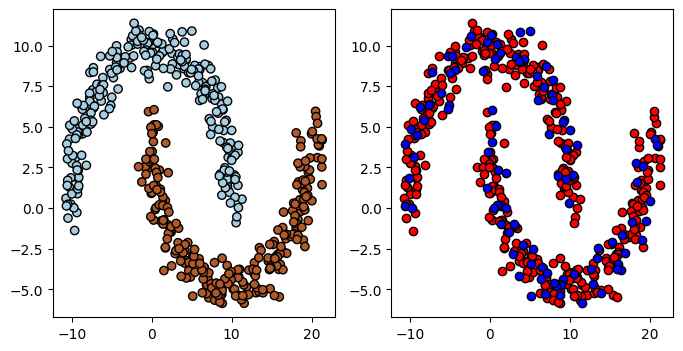

In [30]:
X , y = make_moons(n_samples = 500, noise=0.08, random_state=2) #, centers = clusters
X *= 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

_, axes = plt.subplots(1,2, figsize = (8,4))
axes[0].scatter( X[:, 0], X[:, 1], c=y, cmap='Paired', edgecolors='k')
axes[1].scatter( X_train [:, 0], X_train[:, 1], c='r', edgecolors='k')
axes[1].scatter( X_test [:, 0], X_test [:, 1], c='b', edgecolors='k')
plt.show()

In [ ]:
# import decision boundaries function


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


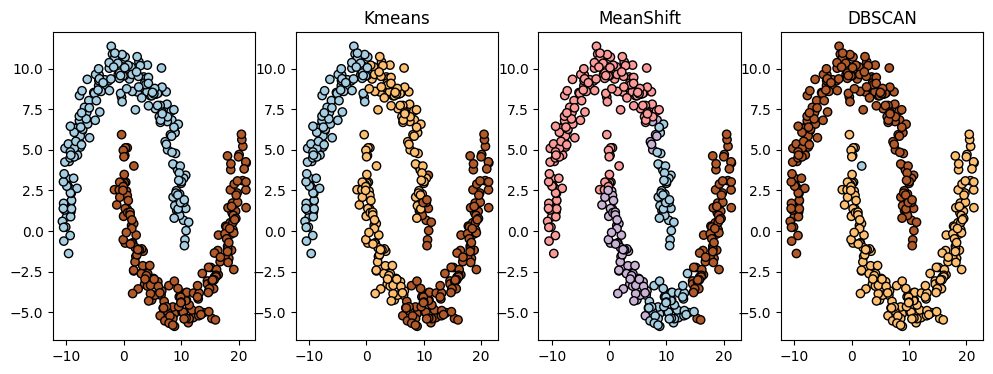

In [44]:
models = [ KMeans(n_clusters=3) , MeanShift(bandwidth=6.5) , DBSCAN(eps=1.5, min_samples=5) ]
names = ["Kmeans", "MeanShift", "DBSCAN"]

_, axes = plt.subplots(1, 4, figsize = (12,4))
predictions = {}

# fit the model
for i, model in enumerate(models) :
    # Instance and train
    model.fit(X_train)

    # Predictions on train and test sets
    if i == 2:
      predictions[names[i]] = model.labels_
    else:
      predictions[names[i]] = model.predict(X_train)

    # Plot everything
    axes[i+1].scatter(X_train[:, 0], X_train[:, 1], c=predictions[names[i]], cmap='Paired', edgecolors='k')
    axes[i+1].set_title(names[i])

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Paired', edgecolors='k')
plt.show()

## Metrics

The metrics module [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [45]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [46]:
## Scores for training data

for name in names :
  print ("########----- Results for {0} -----########".format( name ))
  ari = adjusted_rand_score( y_train , predictions[name] )
  ami = adjusted_mutual_info_score( y_train , predictions[name] )
  sil = silhouette_score(y_train.reshape(-1, 1), predictions[name].reshape(-1,1))
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL -- \t ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami, sil))

########----- Results for Kmeans -----########
-- ARI --	 -- AMI --	 -- SIL -- 	 
  0.299  	   0.358  	   0.134  	
########----- Results for MeanShift -----########
-- ARI --	 -- AMI --	 -- SIL -- 	 
  0.363  	   0.363  	   0.120  	
########----- Results for DBSCAN -----########
-- ARI --	 -- AMI --	 -- SIL -- 	 
  0.995  	   0.989  	   0.505  	


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## Scores for test data

for i, key in enumerate(predsT.keys()):
  print ("########----- Results for {0} -----########".format( _ ))
  ari = adjusted_rand_score( _ , _ )
  ami = adjusted_mutual_info_score( _ , _ )
  ##--------------
  print("-- ARI --\t -- AMI --\t --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami))

## In real data

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
images = (digits.images > 6) * 1.0

_, axes = plt.subplots(1,10, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(images[i].reshape(8,8), cmap="gray")

plt.show()